#**SUPPORT VECTOR MACHINE**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#**Dataset-1**

In [ ]:
df1 = pd.read_csv("/content/HR_Dataset.csv")

In [ ]:
df1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
df1.columns.tolist()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'Departments ',
 'salary']

Removing of duplicates

In [ ]:
df1 = df1.drop_duplicates()
df1.shape

(11991, 10)

In [ ]:
df1['Departments ']= df1['Departments '].replace({'sales':'0', 'support':'1', 'management':'2', 'technical':'3', 'product_mng':'4',
       'RandD':'5', 'IT':'6', 'marketing':'7', 'hr':'8', 'accounting':'9'})
df1['Departments '] = df1['Departments '].astype('float')
df1['salary']= df1['salary'].replace({'low':'0', 'medium':'1', 'high':'2'})
df1['salary'] = df1['salary'].astype('float')

<ipython-input-6-6ef23f7f4d94>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Departments ']= df1['Departments '].replace({'sales':'0', 'support':'1', 'management':'2', 'technical':'3', 'product_mng':'4',
<ipython-input-6-6ef23f7f4d94>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Departments '] = df1['Departments '].astype('float')
<ipython-input-6-6ef23f7f4d94>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Removing of outlilers

In [ ]:
from scipy import stats

z_scores = stats.zscore(df1)
threshold = 2
outliers = (z_scores > threshold).all(axis=1)
df1 = df1[~outliers]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

x1 = df1.drop('left', axis=1)
y1 = df1['left']

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2)

linear_svm = SVC()
linear_svm.fit(x1_train, y1_train)
linear_predictions = linear_svm.predict(x1_test)
linear_accuracy = accuracy_score(y1_test, linear_predictions)
print("Accuracy:", linear_accuracy)
classification_rep = classification_report(y1_test, linear_predictions)
print(f'Classification Report:\n{classification_rep}')


Accuracy: 0.826594414339308
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1983
           1       0.00      0.00      0.00       416

    accuracy                           0.83      2399
   macro avg       0.41      0.50      0.45      2399
weighted avg       0.68      0.83      0.75      2399



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x1_train_scaled = scaler.fit_transform(x1_train)
x1_test_scaled = scaler.transform(x1_test)

clf = SVC()
clf.fit(x1_train_scaled, y1_train)

y_pred = clf.predict(x1_test_scaled)

accuracy = accuracy_score(y1_test, y_pred)
classification_rep = classification_report(y1_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.9741558982909546
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      1983
           1       0.93      0.92      0.93       416

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report


smote = SMOTE(sampling_strategy='auto')
x1_train_resampled, y1_train_resampled = smote.fit_resample(x1_train_scaled, y1_train)

clf = SVC(random_state=42)
clf.fit(x1_train_resampled, y1_train_resampled)

y_pred = clf.predict(x1_test_scaled)

accuracy = accuracy_score(y1_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y1_test, y_pred))

Accuracy: 0.964568570237599
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1983
           1       0.88      0.93      0.90       416

    accuracy                           0.96      2399
   macro avg       0.93      0.95      0.94      2399
weighted avg       0.97      0.96      0.96      2399



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import accuracy_score, classification_report

oversampler = RandomOverSampler(random_state=42)
x1_train_resampled, y1_train_resampled = oversampler.fit_resample(x1_train_scaled, y1_train)

clf = SVC(random_state=42)
clf.fit(x1_train_resampled, y1_train_resampled)

y_pred = clf.predict(x1_test_scaled)
accuracy = accuracy_score(y1_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y1_test, y_pred))

Accuracy: 0.96040016673614
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      1983
           1       0.85      0.93      0.89       416

    accuracy                           0.96      2399
   macro avg       0.92      0.95      0.93      2399
weighted avg       0.96      0.96      0.96      2399



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder


undersampler = RandomUnderSampler(random_state=42)
x1_train_resampled, y1_train_resampled = undersampler.fit_resample(x1_train_scaled, y1_train)

clf = SVC(random_state=42)
clf.fit(x1_train_resampled, y1_train_resampled)

y_pred = clf.predict(x1_test_scaled)
accuracy = accuracy_score(y1_test, y_pred)

print(f'Accuracy: {accuracy}')
print("Classification Report:\n", classification_report(y1_test, y_pred))

Accuracy: 0.9537307211338057
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      1983
           1       0.83      0.93      0.87       416

    accuracy                           0.95      2399
   macro avg       0.91      0.94      0.92      2399
weighted avg       0.96      0.95      0.95      2399



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

clf = SVC(random_state=42)
bagging_classifier = BaggingClassifier(clf, n_estimators=10, random_state=42)

bagging_classifier.fit(x1_train_scaled, y1_train)

y_pred = bagging_classifier.predict(x1_test_scaled)

accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y1_test, y_pred))

Accuracy: 0.9737390579408086
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1983
           1       0.93      0.92      0.92       416

    accuracy                           0.97      2399
   macro avg       0.95      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



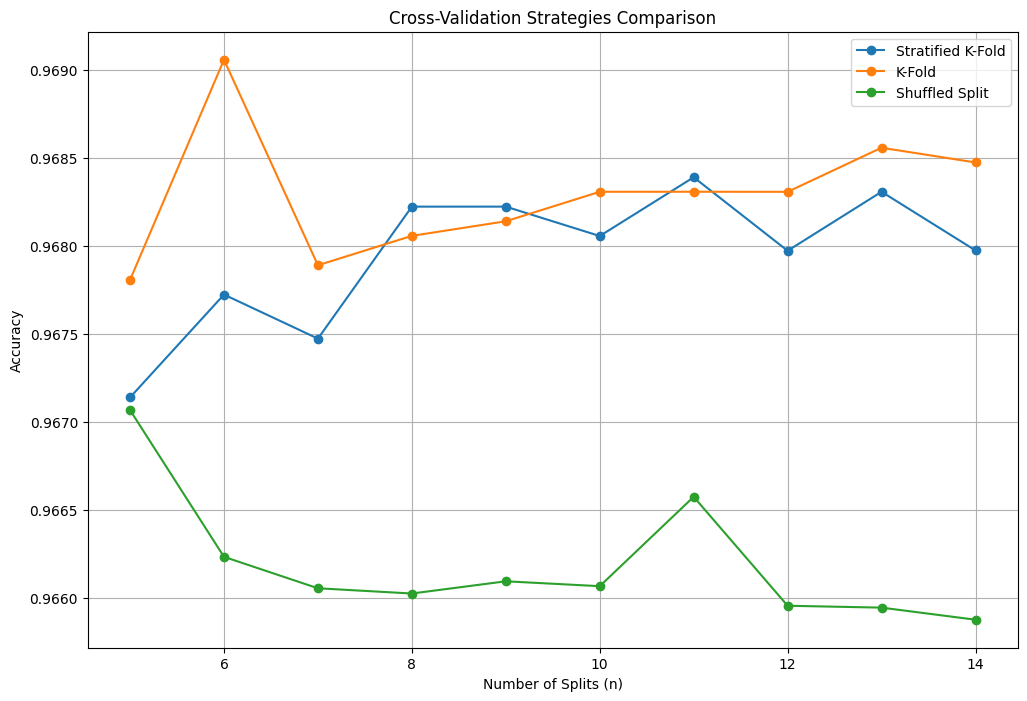

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

n_splits_values = np.arange(5,15)
scaler = StandardScaler()
x1_scaled = scaler.fit_transform(x1)
accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x1_scaled, y1, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x1_scaled, y1, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x1_scaled, y1, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#**Dataset-2**

In [ ]:
df2 = pd.read_csv("/content/dataset4.csv")

In [ ]:
df2

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,...,3,80,1,17,3,3,5,2,0,3
1466,1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,...,1,80,1,9,5,3,7,7,1,7
1467,1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,...,2,80,1,6,0,3,6,2,0,3
1468,1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
df2 = df2.iloc[:,1:]

In [ ]:
df2['Over18']= df2['Over18'].replace({'Y':'0'})
df2['OverTime'] = df2['OverTime'].replace({'Yes':'1','No':'0'})
df2['JobRole'] = df2['JobRole'].replace({'Sales Executive':'0','Research Scientist':'1','Laboratory Technician':'2',
 'Manufacturing Director':'3','Healthcare Representative':'4','Manager':'5',
 'Sales Representative':'6','Research Director':'7', 'Human Resources':'8'})
df2['MaritalStatus'] = df2['MaritalStatus'].replace({'Single':'0','Married':'1','Divorced':'2'})
df2['Attrition'] = df2['Attrition'].replace({'Yes':'1','No':'0'})
df2['BusinessTravel'] = df2['BusinessTravel'].replace({'Travel_Rarely':'0','Travel_Frequently':'1','Non-Travel':'2'})
df2['Department'] = df2['Department'].replace({'Sales':'0','Research & Development':'1','Human Resources':'2'})
df2['EducationField'] = df2['EducationField'].replace({'Life Sciences':'0','Medical':'1','Marketing':'2','Technical Degree':'3','Human Resources':'4','Other':'5'})
df2['Gender'] = df2['Gender'].replace({'Female':'0','Male':'1'})
df2['Over18']= df2['Over18'].astype('int')
df2['OverTime']=df2['OverTime'].astype('int')
df2['JobRole']= df2['JobRole'].astype('int')
df2['MaritalStatus']= df2['MaritalStatus'].astype('int')
df2['Attrition'] = df2['Attrition'].astype('int')
df2['BusinessTravel'] = df2['BusinessTravel'].astype('int')
df2['Department'] = df2['Department'].astype('int')
df2['EducationField'] = df2['EducationField'].astype('int')
df2['Gender'] = df2['Gender'].astype('int')

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

x2 = df2.drop('Attrition',axis= 1)
y2 = df2['Attrition']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
x2_train_scaled = scaler.fit_transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

clf = SVC(random_state=42)
clf.fit(x2_train_scaled, y2_train)

y_pred = clf.predict(x2_test_scaled)

accuracy = accuracy_score(y2_test, y_pred)
classification_rep = classification_report(y2_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.8775510204081632
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       1.00      0.08      0.14        39

    accuracy                           0.88       294
   macro avg       0.94      0.54      0.54       294
weighted avg       0.89      0.88      0.83       294



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x2_train_resampled, y2_train_resampled = smote.fit_resample(x2_train_scaled, y2_train)
clf = SVC()
clf.fit(x2_train_resampled, y2_train_resampled)

y_pred = clf.predict(x2_test_scaled)
accuracy = accuracy_score(y2_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y2_test, y_pred))

Accuracy: 0.8401360544217688
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       255
           1       0.40      0.44      0.42        39

    accuracy                           0.84       294
   macro avg       0.66      0.67      0.66       294
weighted avg       0.85      0.84      0.84       294



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)
x2_train_resampled, y2_train_resampled = oversampler.fit_resample(x2_train_scaled, y2_train)

clf = SVC(random_state=42)
clf.fit(x2_train_resampled, y2_train_resampled)

y_pred = clf.predict(x2_test_scaled)
accuracy = accuracy_score(y2_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y2_test, y_pred))

Accuracy: 0.826530612244898
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       255
           1       0.37      0.44      0.40        39

    accuracy                           0.83       294
   macro avg       0.64      0.66      0.65       294
weighted avg       0.84      0.83      0.83       294



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler


undersampler = RandomUnderSampler(random_state=42)
x2_train_resampled, y2_train_resampled = undersampler.fit_resample(x2_train_scaled, y2_train)

clf = SVC(random_state=42)
clf.fit(x2_train_resampled, y2_train_resampled)

y_pred = clf.predict(x2_test_scaled)
accuracy = accuracy_score(y2_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y2_test, y_pred))

Accuracy: 0.7380952380952381
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.76      0.83       255
           1       0.27      0.59      0.37        39

    accuracy                           0.74       294
   macro avg       0.60      0.68      0.60       294
weighted avg       0.84      0.74      0.77       294



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


bagging_classifier = BaggingClassifier(clf, n_estimators=10, random_state=42)

bagging_classifier.fit(x2_train_scaled, y2_train)

y_pred = bagging_classifier.predict(x2_test_scaled)

accuracy = accuracy_score(y2_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y2_test, y_pred))

Accuracy: 0.8809523809523809
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       1.00      0.10      0.19        39

    accuracy                           0.88       294
   macro avg       0.94      0.55      0.56       294
weighted avg       0.90      0.88      0.84       294



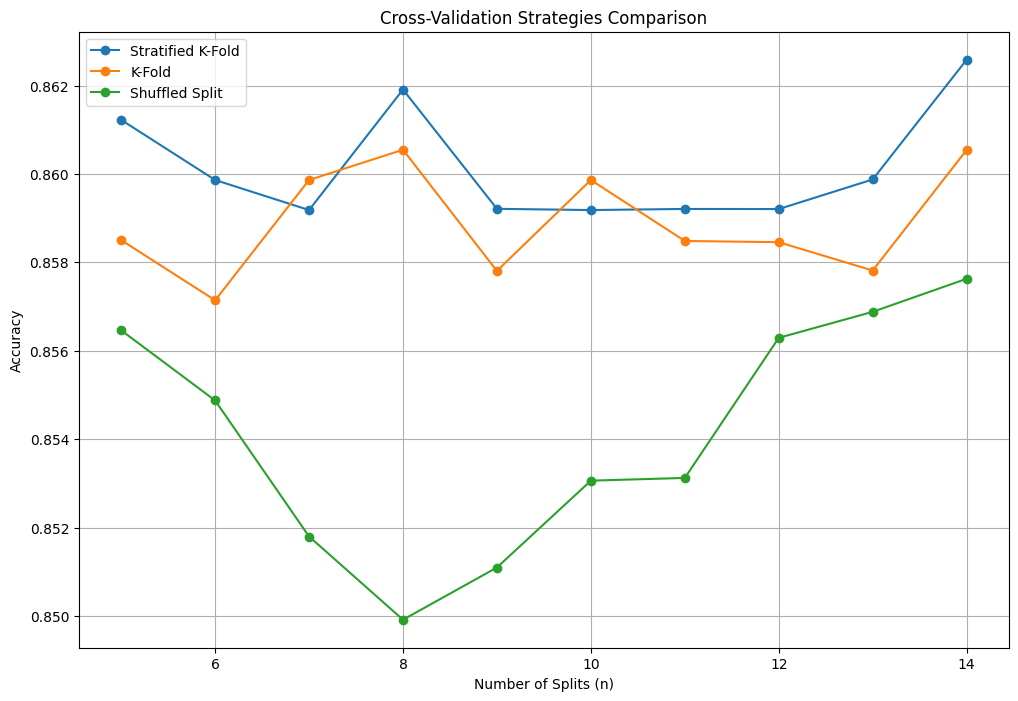

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

n_splits_values = np.arange(5,15)
scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2)
accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2_scaled, y2, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2_scaled, y2, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x2_scaled, y2, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

#**Dataset-3**

In [ ]:
df3=pd.read_csv('/content/Employee.csv')

In [ ]:
df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [ ]:
df3.columns.tolist()

['Education',
 'JoiningYear',
 'City',
 'PaymentTier',
 'Age',
 'Gender',
 'EverBenched',
 'ExperienceInCurrentDomain',
 'LeaveOrNot']

In [ ]:
df3 = df3.drop_duplicates()
df3

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [ ]:
df3['Education'] = df3['Education'].replace({'Bachelors':'0','Masters':'1','PHD':'2'})
df3['City'] = df3['City'].replace({'Bangalore':'0','Pune':'1','New Delhi':'2'})
df3['EverBenched'] = df3['EverBenched'].replace({'No':'0','Yes':'1'})
df3['Gender'] = df3['Gender'].replace({'Female':'0','Male':'1'})
df3['Education']= df3['Education'].astype('int')
df3['City']=df3['City'].astype('int')
df3['Gender']= df3['Gender'].astype('int')
df3['EverBenched']= df3['EverBenched'].astype('int')
df3

<ipython-input-48-52d4bd590019>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Education'] = df3['Education'].replace({'Bachelors':'0','Masters':'1','PHD':'2'})
<ipython-input-48-52d4bd590019>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['City'] = df3['City'].replace({'Bangalore':'0','Pune':'1','New Delhi':'2'})
<ipython-input-48-52d4bd590019>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,1,0,0,0
1,0,2013,1,1,28,0,0,3,1
2,0,2014,2,3,38,0,0,2,0
3,1,2016,0,3,27,1,0,5,1
4,1,2017,1,3,24,1,1,2,1
...,...,...,...,...,...,...,...,...,...
4645,1,2017,1,2,31,0,0,2,0
4647,0,2016,1,3,30,1,0,2,0
4649,1,2013,1,2,37,1,0,2,1
4650,1,2018,2,3,27,1,0,5,1


In [ ]:
from scipy import stats

z_scores = stats.zscore(df3)
threshold = 3
outliers = (z_scores > threshold).all(axis=1)
df3 = df3[~outliers]

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

x3 = df3.drop('LeaveOrNot', axis=1)
y3 = df3['LeaveOrNot']

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2,random_state=42)

clf = SVC(random_state=42)
clf.fit(x3_train, y3_train)
y3_pred = clf.predict(x3_test)

accuracy = accuracy_score(y3_test, y3_pred)
print(f"Accuracy: {accuracy}")
classification_rep = classification_report(y3_test, y3_pred)
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.6021699819168174
Classification Report:
              precision    recall  f1-score   support

           0       0.60      1.00      0.75       333
           1       0.00      0.00      0.00       220

    accuracy                           0.60       553
   macro avg       0.30      0.50      0.38       553
weighted avg       0.36      0.60      0.45       553



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder


scaler = StandardScaler()
x3_train_scaled = scaler.fit_transform(x3_train)
x3_test_scaled = scaler.transform(x3_test)

clf = SVC(random_state=42)
clf.fit(x3_train_scaled, y3_train)

y_pred = clf.predict(x3_test_scaled)

accuracy = accuracy_score(y3_test, y_pred)
conf_matrix = confusion_matrix(y3_test, y_pred)
classification_rep = classification_report(y3_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_rep)

Accuracy: 0.7739602169981917
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.93      0.83       333
           1       0.84      0.53      0.65       220

    accuracy                           0.77       553
   macro avg       0.80      0.73      0.74       553
weighted avg       0.79      0.77      0.76       553



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
x3_train_resampled, y3_train_resampled = smote.fit_resample(x3_train_scaled, y3_train)

clf = SVC(random_state=42)
clf.fit(x3_train_resampled, y3_train_resampled)

y_pred = clf.predict(x3_test_scaled)
accuracy = accuracy_score(y3_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y3_test, y_pred))

Accuracy: 0.755877034358047
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       333
           1       0.70      0.67      0.69       220

    accuracy                           0.76       553
   macro avg       0.75      0.74      0.74       553
weighted avg       0.75      0.76      0.75       553



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler


oversampler = RandomOverSampler(random_state=42)
x3_train_resampled, y3_train_resampled = oversampler.fit_resample(x3_train_scaled, y3_train)

clf = SVC(random_state=42)
clf.fit(x3_train_resampled, y3_train_resampled)

y_pred = clf.predict(x3_test)
accuracy = accuracy_score(y3_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y3_test, y_pred))

Accuracy: 0.6021699819168174
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       333
           1       0.00      0.00      0.00       220

    accuracy                           0.60       553
   macro avg       0.30      0.50      0.38       553
weighted avg       0.36      0.60      0.45       553



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler


undersampler = RandomUnderSampler(random_state=42)
x3_train_resampled, y3_train_resampled = undersampler.fit_resample(x3_train_scaled, y3_train)

clf = SVC(random_state=42)
clf.fit(x3_train_resampled, y3_train_resampled)

y_pred = clf.predict(x3_test)
accuracy = accuracy_score(y3_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y3_test, y_pred))

Accuracy: 0.6021699819168174
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       333
           1       0.00      0.00      0.00       220

    accuracy                           0.60       553
   macro avg       0.30      0.50      0.38       553
weighted avg       0.36      0.60      0.45       553



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` pa

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris


bagging_classifier = BaggingClassifier(clf, n_estimators=10, random_state=42)

bagging_classifier.fit(x3_train_scaled, y3_train)

y_pred = bagging_classifier.predict(x3_test_scaled)

accuracy = accuracy_score(y3_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y3_test, y_pred))

Accuracy: 0.7757685352622061
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.94      0.83       333
           1       0.85      0.53      0.65       220

    accuracy                           0.78       553
   macro avg       0.80      0.73      0.74       553
weighted avg       0.79      0.78      0.76       553



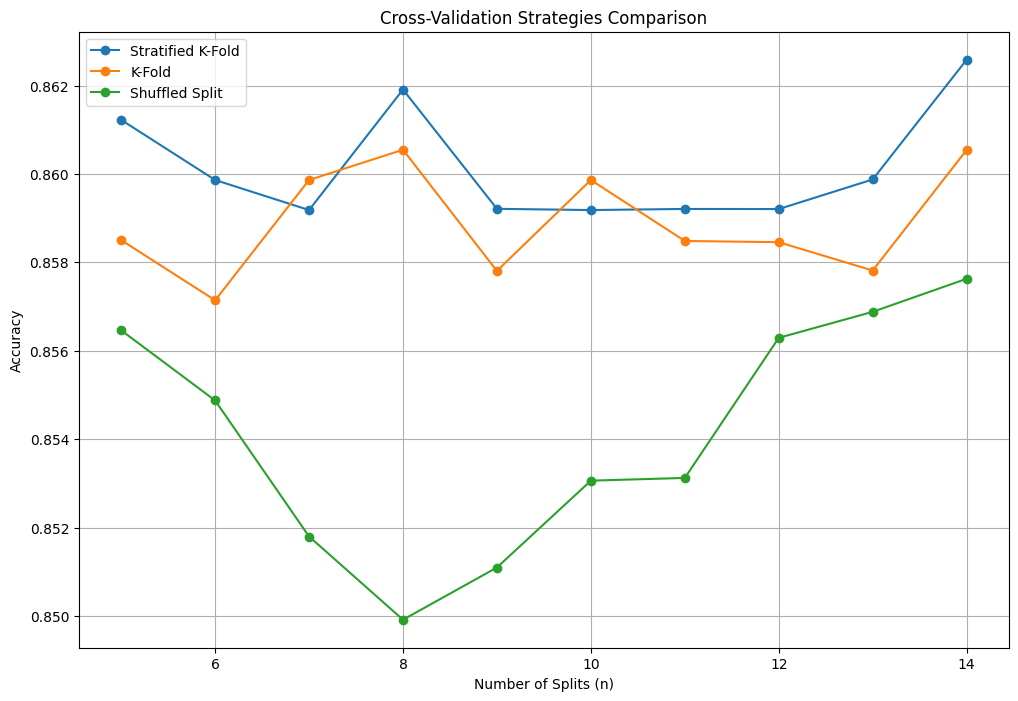

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, LeaveOneOut, ShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

n_splits_values = np.arange(5,15)
scaler = StandardScaler()
x2_scaled = scaler.fit_transform(x2)
accuracy_stratified = []
accuracy_kfold = []
accuracy_shuffled = []
accuracy_leave_one_out = []

for n_splits in n_splits_values:

    stratified_cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2_scaled, y2, cv=stratified_cv, scoring='accuracy')
    accuracy_stratified.append(np.mean(scores))

    kfold_cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = cross_val_score(clf, x2_scaled, y2, cv=kfold_cv, scoring='accuracy')
    accuracy_kfold.append(np.mean(scores))

    shuffled_cv = ShuffleSplit(n_splits=n_splits, test_size=0.2, random_state=42)
    scores = cross_val_score(clf, x2_scaled, y2, cv=shuffled_cv, scoring='accuracy')
    accuracy_shuffled.append(np.mean(scores))

plt.figure(figsize=(12, 8))
plt.plot(n_splits_values, accuracy_stratified, label='Stratified K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_kfold, label='K-Fold', marker='o')
plt.plot(n_splits_values, accuracy_shuffled, label='Shuffled Split', marker='o')

plt.title('Cross-Validation Strategies Comparison')
plt.xlabel('Number of Splits (n)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()